# 1. File description 

This file is meant to clean and tranform the data already existing to a format that will be used for labelling. Some EDA and feature engineering will be done here but as the data is not labelled, most of it will be done after the labelling.

## 2.1 Modules and UDFs

In [144]:
import src.viz as sv
import src.useful as su


# Data manipulation
import sqlite3
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

# Data vizualisation
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

# For charging bars for for loops and pd.Series.apply()
from tqdm.auto import tqdm
tqdm.pandas()

# To control time
from datetime import datetime, timedelta

# To manupulate emojis
import demoji

# To retrive domain from url 
from urllib.parse import urlparse

# To move files around
import shutil

from IPython.display import Image

### Setting notebook preferences
Setting pandas to not limit the number of displayed columns and open database

In [145]:
pd.set_option("display.max_columns", None)
pio.templates.default = "plotly_dark"

# Creating SQL database to store all the data for the project
database = "data/main_database.sqlite"
con = sqlite3.connect(database)

In [146]:
query = '''
select 
    * 
from sqlite_master'''

df_sqlite_master = pd.read_sql_query('select * from sqlite_master', con)
for tbl in df_sqlite_master['tbl_name']:
    print(tbl, pd.read_sql_query(f'select * from {tbl}', con).shape)

comments (134465, 12)
last_12_posts (363408, 9)
post_ids (7831, 2)
photos (467299, 3)
users (86343, 65)


Now, each table is going to be cleaned and put in a nice format

### 1. Comments

This table contains all the comments collected and each row of the table represent a single comment. It's possible that if a user commented twice on a post, I collected both of the comment or caught the comment of the same users on multiple post.
The goal is to clean the table, and output it in a clean and organized table

In [147]:
query = '''
select 
    * 
from comments
'''

df_comments = pd.read_sql_query(query, con)
df_comments.query('username in page').head()

,page,postid,legend,post_likes,post_posted_time,username,full_comment_data,comment,comment_posted_time,comments_likes,comment_comments_count,data_collected_time
28769,meme.ig,CYqmMFalyy3,meme.igY’all gotta follow @lolpickupliness & @...,"90,649 likes",2022-01-13T09:41:09.000Z,meme.ig,meme.igMy soul left my body I felt blank for a...,My soul left my body I felt blank for a minute,2022-01-13T09:47:38.000Z,944 likes,4,2022-01-18 04:03:51.359886
47029,pubity,CX6DpVTJpHD,pubityMade his year 🥺❤️-(Via @contentbible)3w,"1,162,392 likes",2021-12-25T13:16:12.000Z,pubity,pubityIt is both his birthday and Christmas bt...,It is both his birthday and Christmas btw 🎉🎄,2021-12-25T13:32:15.000Z,"17,624 likes",104,2022-01-18 20:10:51.468783
50530,meme.ig,CXcWFcFDU-q,mindblowin.g@MEME.IG @HOTDOGS really the best ...,"228,433 likes",2021-12-14T00:19:47.000Z,meme.ig,"meme.igHomie just kept goin5w3,879 likesReplyV...",Homie just kept goin,2021-12-14T00:20:23.000Z,"3,879 likes",1,2022-01-18 05:54:42.541059
77484,meme.ig,CYti5wkBv1n,pubertyhit.severy boy needs to see this video4d,"254,029 likes",2022-01-14T13:10:12.000Z,meme.ig,"meme.igClassic fit4d2,151 likesReplyView repli...",Classic fit,2022-01-14T13:11:16.000Z,"2,151 likes",2,2022-01-19 03:18:24.106187
112710,meme.ig,CXuW7-7jFEq,mindblowin.gBruh 😭💀 @MEME.IG @HOTDOGS4w,"754,794 likes",2021-12-21T00:13:59.000Z,meme.ig,"meme.igHe’s a runner he’s a track star4w18,392...",He’s a runner he’s a track star,2021-12-21T00:18:53.000Z,"18,392 likes",24,2022-01-18 16:56:53.158904


In [148]:
df_comments.describe(include='all').round()

,page,postid,legend,post_likes,post_posted_time,username,full_comment_data,comment,comment_posted_time,comments_likes,comment_comments_count,data_collected_time
count,134465,134465,134465,134465,134465,134465,134465,134465,134465,134465,134465.0,134465
unique,24,5614,5593,5579,5605,88608,133776,119362,124263,7610,NaN,134465
top,nfl,CYh6UW-IWUc,slamVerifiedThis is a shout out to one of our ...,"231,598 likes",2022-01-10T00:44:01.000Z,slimjimVerified,chris_lio7🔥7wReply,🔥🔥🔥,2022-01-02T18:24:58.000Z,Reply,NaN,2022-01-17 02:18:25.197544
freq,9544,80,80,120,104,316,7,234,10,16003,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


In [149]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134465 entries, 0 to 134464
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   page                    134465 non-null  object
 1   postid                  134465 non-null  object
 2   legend                  134465 non-null  object
 3   post_likes              134465 non-null  object
 4   post_posted_time        134465 non-null  object
 5   username                134465 non-null  object
 6   full_comment_data       134465 non-null  object
 7   comment                 134465 non-null  object
 8   comment_posted_time     134465 non-null  object
 9   comments_likes          134465 non-null  object
 10  comment_comments_count  134465 non-null  int64 
 11  data_collected_time     134465 non-null  object
dtypes: int64(1), object(11)
memory usage: 12.3+ MB


Luckily no duplicates, some columns as likes and comment likes need to be integers, others as the dates need to me in a date format.

* There are 134.465 rows of data, meaning the same number of comments
* Total of 88608 users meaning an average of 1.5 comment per user
* Post likes and comment need the numbers to be extracted and columns changed to integer 
* The three date columns don't have a correct type
* Some columns names are not explicit enough, might need to change them
* Some columns are irrelevant to this analysis. For example, the legend of the post will have no effect on the bot/non bot user so there is no point of keeping them
* No missing values! :emoji_dab:

### 1.1 Removing irrelevant columns & column names

I collected too much data, some columns are irrelevant to the analysis or the model develoment as the page, postid, post_likes and others are independant from the bots.

In [150]:
df_comments = df_comments.rename({'legend': 'caption',
                                  'comments_likes': 'comment_likes',
                                  'comment_comments_count': 'comment_reply_count'}, axis=1)

df_comments.columns

Index(['page', 'postid', 'caption', 'post_likes', 'post_posted_time',
       'username', 'full_comment_data', 'comment', 'comment_posted_time',
       'comment_likes', 'comment_reply_count', 'data_collected_time'],
      dtype='object')

In [151]:
pages = list(set(df_comments['page']))

# Dropping irrelevant columns and changing the columns order
df_comments = df_comments[["username", "comment", "comment_likes", "comment_posted_time", "post_posted_time", 'page']]

df_comments.head(0)

,username,comment,comment_likes,comment_posted_time,post_posted_time,page


### 1.2 Verified usernames  

When collecting the data, I didn't see that when colelcting the username of the verified users, I was also adding 'Verified' to it as it was probably in the html and didn't see.

In [152]:
print('Number accounts finishing by Verified')
df_comments.query('username.str.endswith("Verified")')['username'].unique().shape

Number accounts finishing by Verified


(1642,)

In [153]:
# Creating Verified flag
df_comments['verified_user'] = df_comments['username'].apply(lambda x: 1 if 'Verified' in x else 0)

# Replacing Verified by nothing. all usernames are lower so no need to be worried of replacing user named Verified
df_comments['username'] = df_comments['username'].apply(lambda x: x[:-8] if x[-8:]=="Verified" else x)

print('Number accounts finishing by Verified')
df_comments.query('username.str.endswith("Verified")')['username'].unique().shape

Number accounts finishing by Verified


(0,)

In [154]:
df_comments.query('username in @pages').head()

,username,comment,comment_likes,comment_posted_time,post_posted_time,page,verified_user
8,bleacherreport,Bucks are up 39 on the Warriors 😳,"2,489 likes",2022-01-14T01:41:56.000Z,2022-01-14T01:41:02.000Z,bleacherreport,1
180,houseofhighlights,💯,428 likes,2022-01-12T16:52:53.000Z,2022-01-12T16:46:08.000Z,bleacherreport,1
253,slam,📷: @atibaphotoReply,1 like,2021-12-02T18:04:41.000Z,2021-12-02T17:59:48.000Z,slam,1
1397,nfl,Catch the full interview between @williemcgine...,346 likes,2022-01-14T20:31:48.000Z,2022-01-14T20:30:43.000Z,nflnetwork,1
4409,brgridiron,How Jalen responded to this says a lot about h...,"17,883 likes",2022-01-03T15:07:28.000Z,2022-01-03T14:48:26.000Z,bleacherreport,1


### 1.2 Posted time

Both posted time columns don't have the proper datatype, they need to be datetime. Itself it doesn't help much but I can subtract both date and know how many seconds after the post has been posted, the comment has been too. 

In [155]:
# Changing column to datetime & adding time difference
df_comments["post_posted_time"] = pd.to_datetime(df_comments["post_posted_time"])
df_comments["comment_posted_time"] = pd.to_datetime(df_comments["comment_posted_time"])

# The only useful thing I can get from the datetime columns is the time difference so I'll get it and say adios to both
df_comments["time_difference"] = (df_comments["comment_posted_time"] - df_comments["post_posted_time"]).dt.seconds
df_comments = df_comments.drop(["comment_posted_time", "post_posted_time"], axis=1)

df_comments.query('username in @pages').head()

,username,comment,comment_likes,page,verified_user,time_difference
8,bleacherreport,Bucks are up 39 on the Warriors 😳,"2,489 likes",bleacherreport,1,54
180,houseofhighlights,💯,428 likes,bleacherreport,1,405
253,slam,📷: @atibaphotoReply,1 like,slam,1,293
1397,nfl,Catch the full interview between @williemcgine...,346 likes,nflnetwork,1,65
4409,brgridiron,How Jalen responded to this says a lot about h...,"17,883 likes",bleacherreport,1,1142


In [156]:
df_comments['time_difference'].describe().round().to_frame()

,time_difference
count,134465.0
mean,3293.0
std,11381.0
min,3.0
25%,70.0
50%,194.0
75%,597.0
max,86394.0


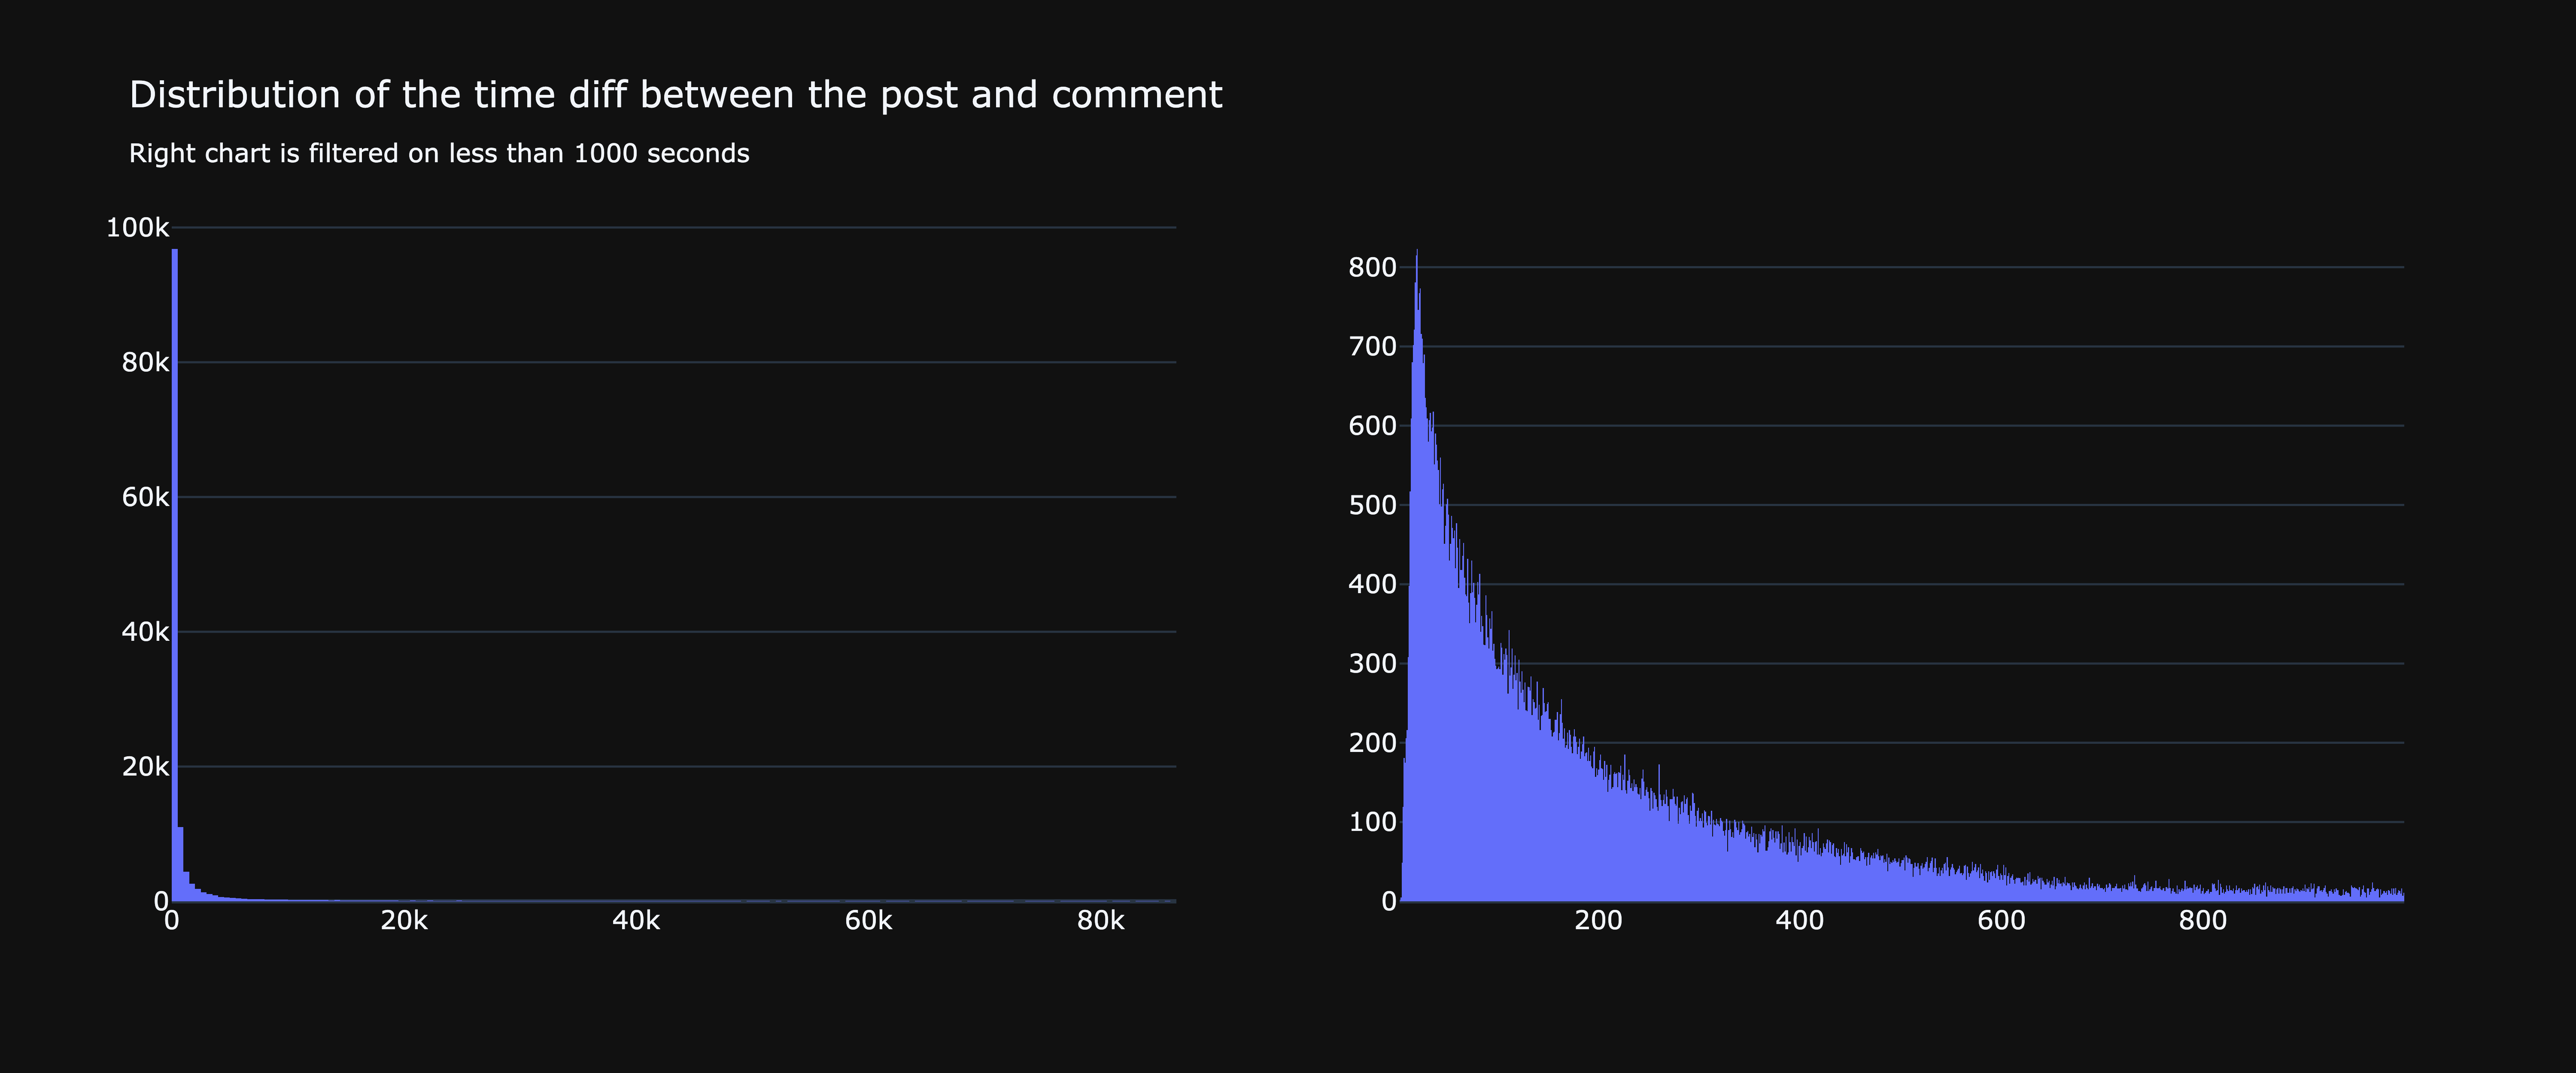

In [157]:
# Show distribution of the comments and the time difference
fig1 = px.histogram(df_comments, 
                    x = 'time_difference')
                    
fig2 = px.histogram(df_comments.query('time_difference < 1000'), 
                    x = 'time_difference', 
                    nbins = 1000)

# Join figures
fig_join = sv.join_plots([fig1, fig2],
                         title='Distribution of the time diff between the post and comment',
                         subtitle='Right chart is filtered on less than 1000 seconds')

# Save chart
file_name = 'Distribution of the time diff between the post and comment - Dual Histogram lt 1000'
sv.save_plotly(fig_join, file_name, 'image')

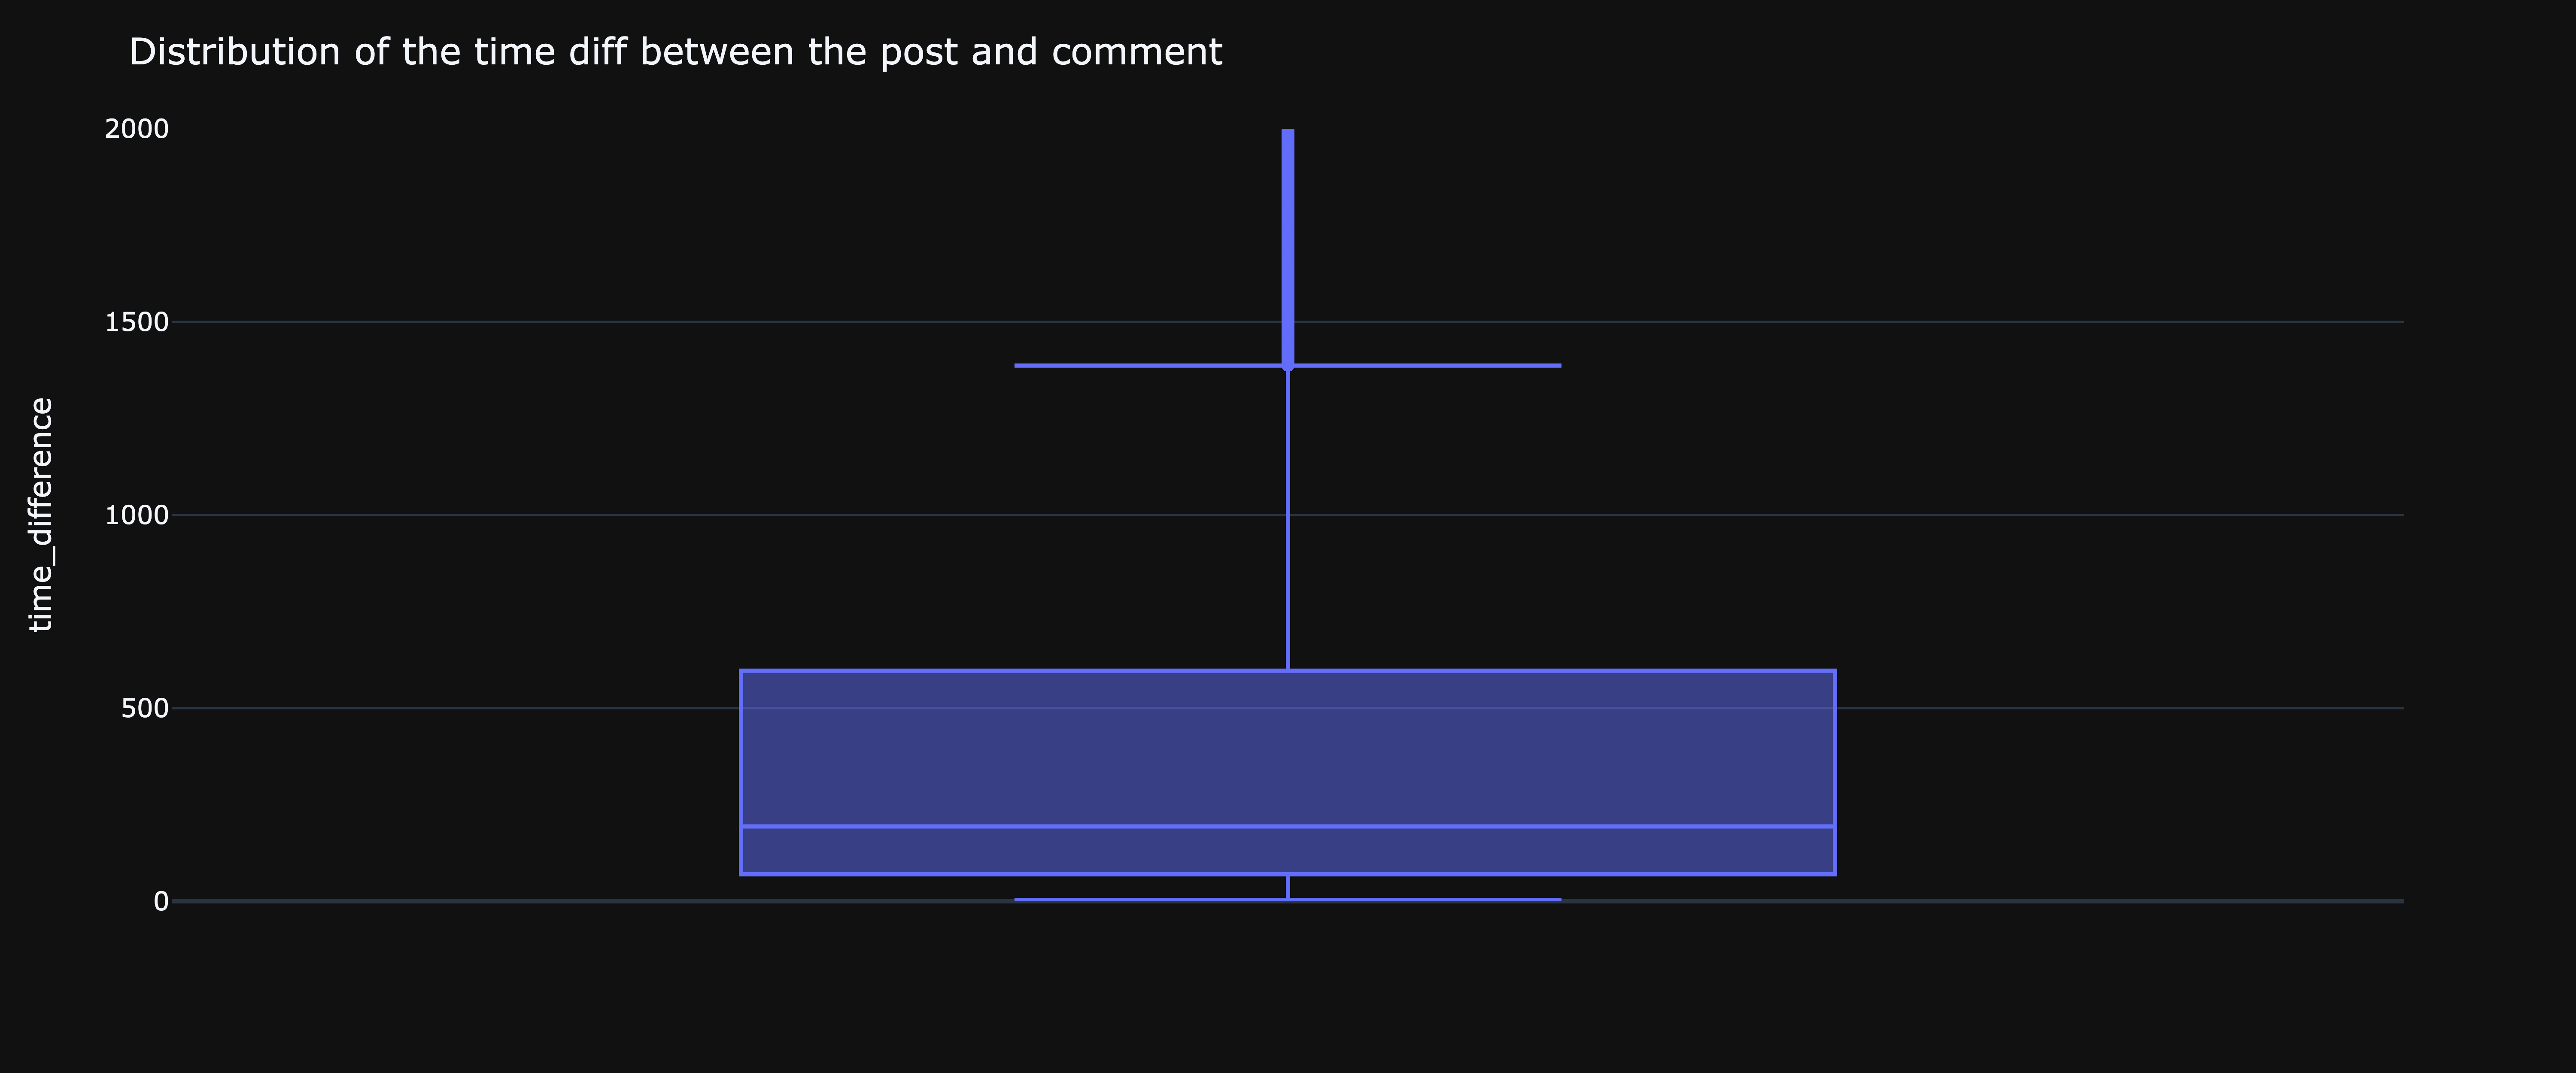

In [158]:
# Create box plot 
fig = px.box(df_comments, y="time_difference")
fig.update_layout(yaxis_range=(0, 2000), # Don't show the chart above 1000 seconds
                  title="Distribution of the time diff between the post and comment")


# Save chart
file_name = 'Distribution of the time diff between the post and comment - Dual Histogram lt 500'
sv.save_plotly(fig, file_name, 'image')

Most of the commetn collected, 75% have been posted in the first 10 minutes after the post has been posted. The median is a third of that, half of the comments were posted in the first three minutes. The peak of the most comments posted at the same time happends 19-20 seconds after the post is published. Once the users are labelled, it'll be interesting to see the difference in that 0-20 seconds window to see the ratio of bots compared to later. 

### 1.3 Comment likes
The like columns is string containing the number of likes formated with thousand commas followed by 'Likes'. The column should be and ineger without any character being non numeric

In [159]:
print('With likes')
display(df_comments['comment_likes'].head())
print('Without likes')
df_comments.query('comment_likes.str.contains("like")==False')['comment_likes'].head()

With likes


0    2,234 likes
1    3,011 likes
2      967 likes
3    1,024 likes
4      966 likes
Name: comment_likes, dtype: object

Without likes


23     Reply
104    Reply
107    Reply
176    Reply
178    Reply
Name: comment_likes, dtype: object

In [160]:
# Replacing 'Reply' by '0' and then extracting all numbers from the strings
df_comments.loc[df_comments['comment_likes']=='Reply', 'comment_likes'] = '0'
df_comments['comment_likes'] = df_comments['comment_likes'].str.replace('\D+', '', regex=True).astype(int)

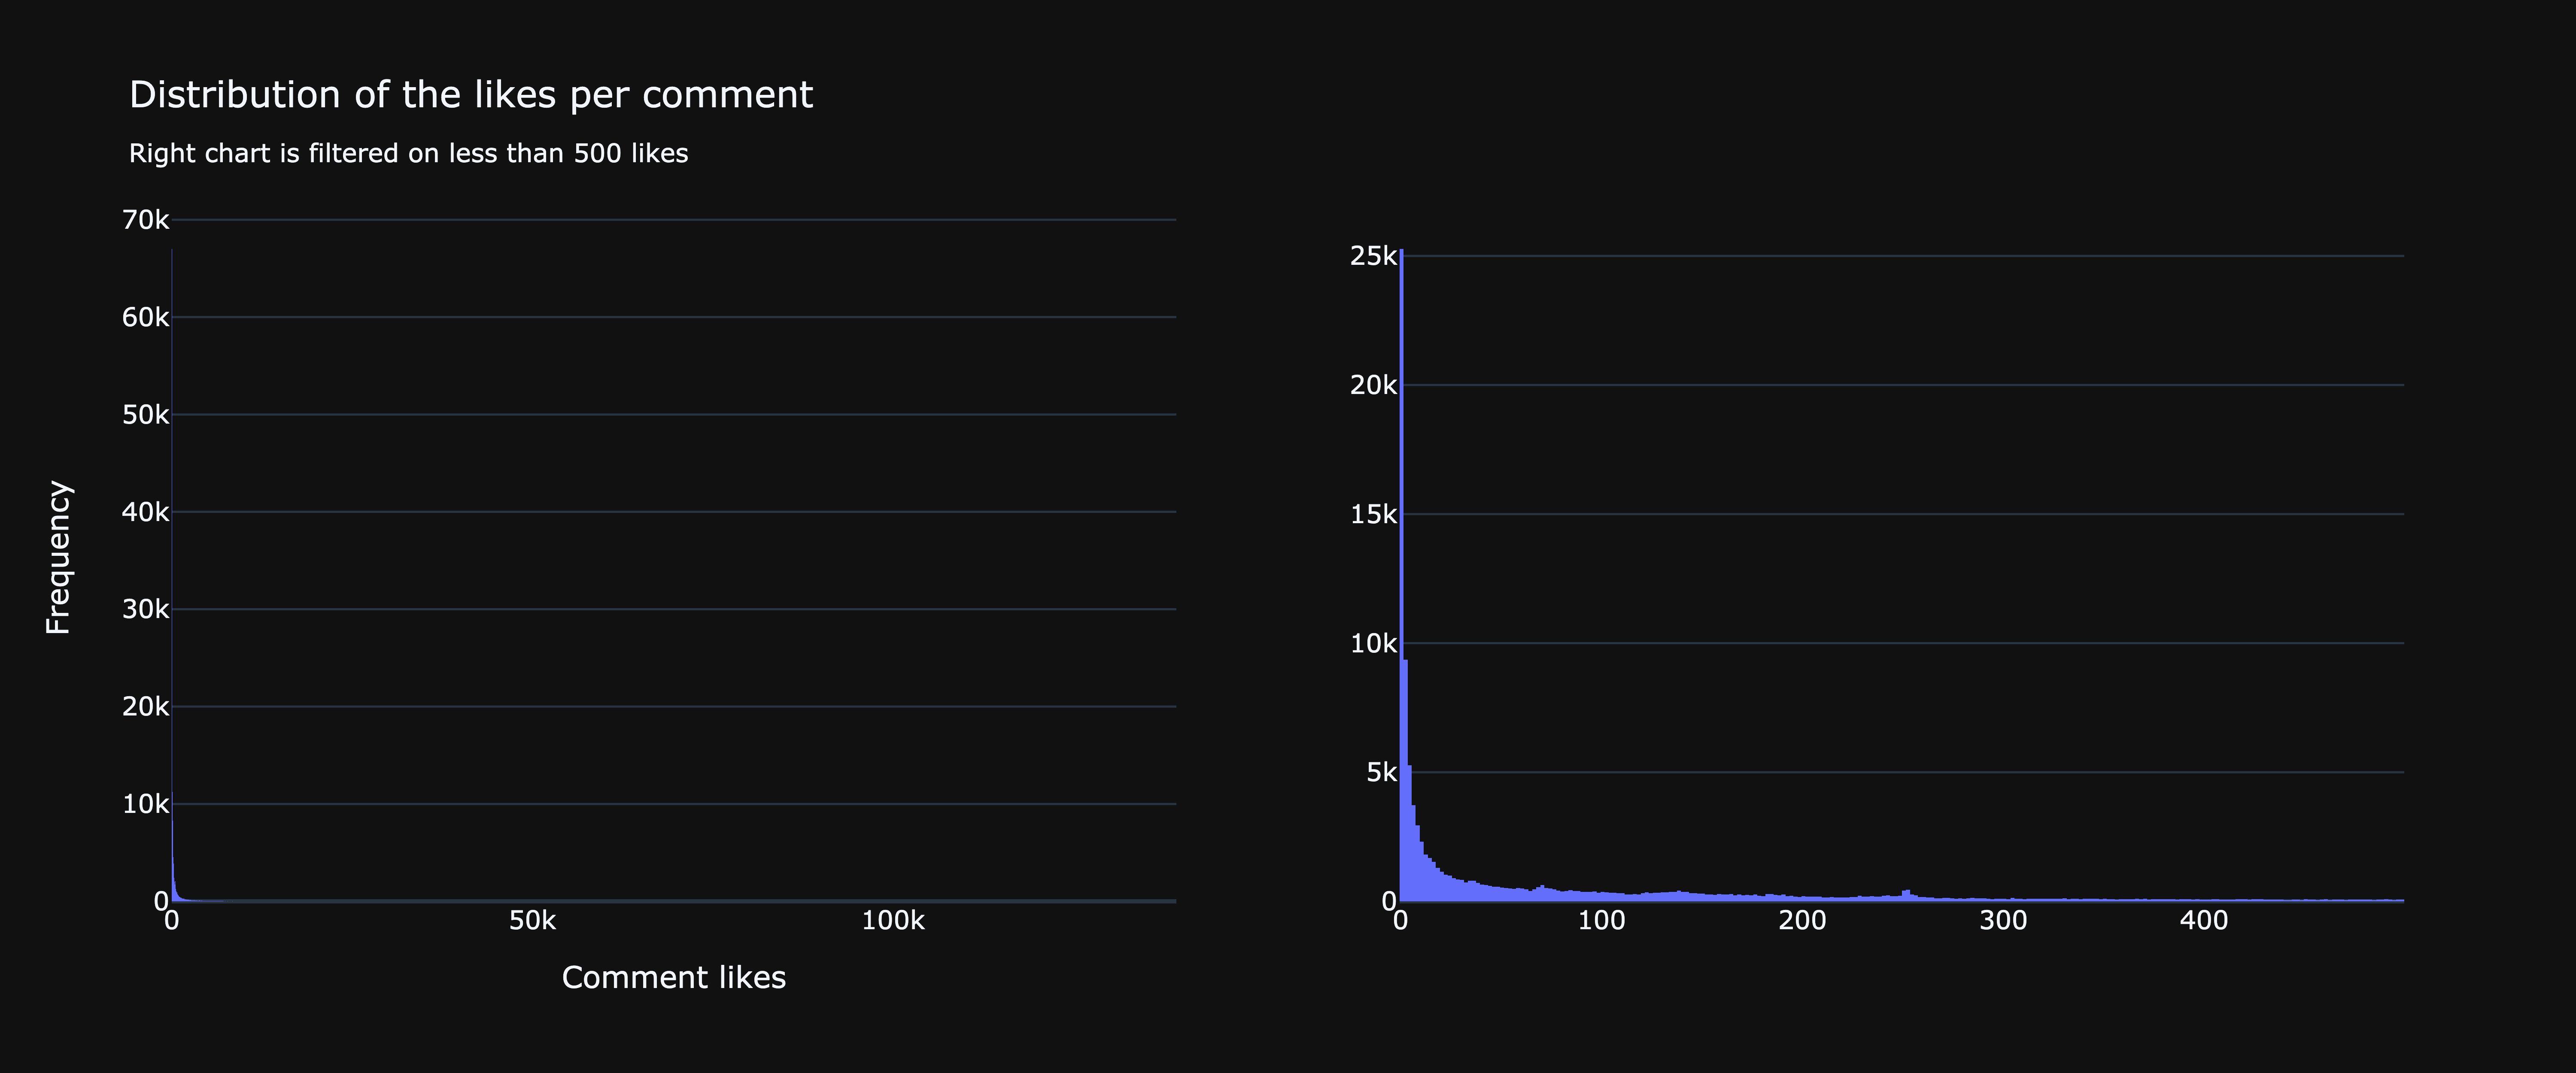

In [161]:
# Show distribution of the comments and the time difference
fig1 = px.histogram(df_comments, 
                    x = 'comment_likes')
                    
fig2 = px.histogram(df_comments.query('comment_likes < 500'), 
                    x = 'comment_likes', 
                    nbins = 400)


fig_join = sv.join_plots([fig1, fig2],
                         title='Distribution of the likes per comment',
                         subtitle='Right chart is filtered on less than 500 likes')

# Update axis names
fig_join.update_layout(xaxis_title="Comment likes",
                       yaxis_title="Frequency")

# Save chart
file_name = 'Distribution of the likes per comment - Dual Histogram lt 500'
sv.save_plotly(fig_join, file_name, 'image')

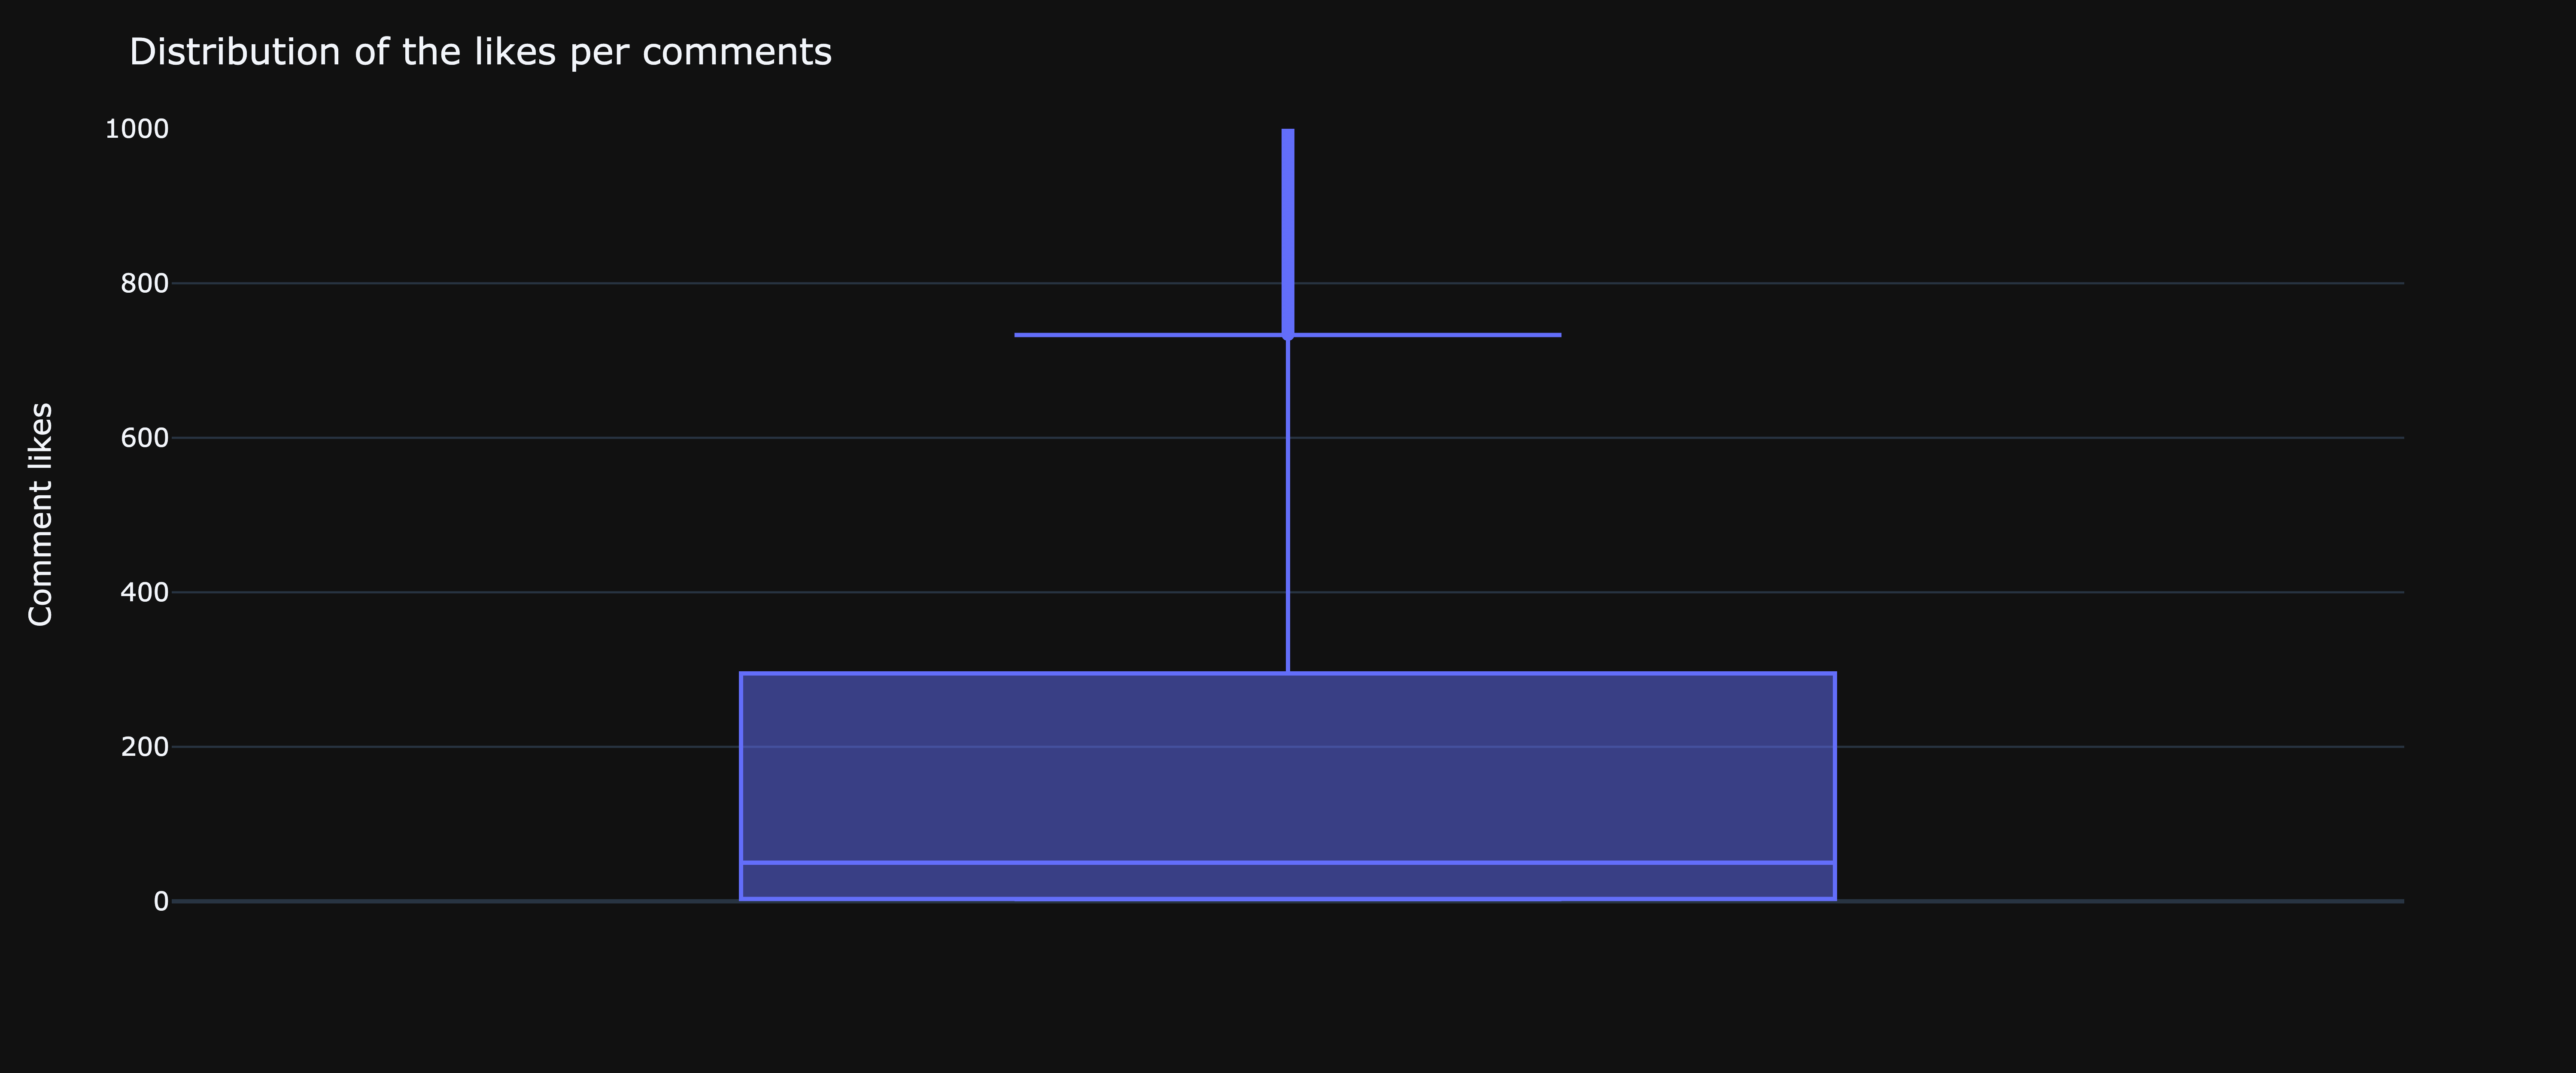

In [162]:
# Create box plot 
fig = px.box(df_comments, 
             y="comment_likes")

fig.update_layout(title='Distribution of the likes per comments', 
                  yaxis_range=(0, 1000), # Don't show the chart above 1000 seconds
                  yaxis_title="Comment likes") 


# Save chart
file_name = 'Distribution of the likes per comment - box plot'
sv.save_plotly(fig, file_name, 'image')

75% of the comments have less than 295 likes with half less than 50 likes. Let's look at the relationship with likes and how it varies depending on when the comment has been posted. 

In [163]:
# The user table is not yet clean but I can still get the follower count of all users
query = '''
select 
    distinct 
    username
    , edge_followed_by_count as follower_count
from users
'''

df_users_follow_count = pd.read_sql_query(query, con)

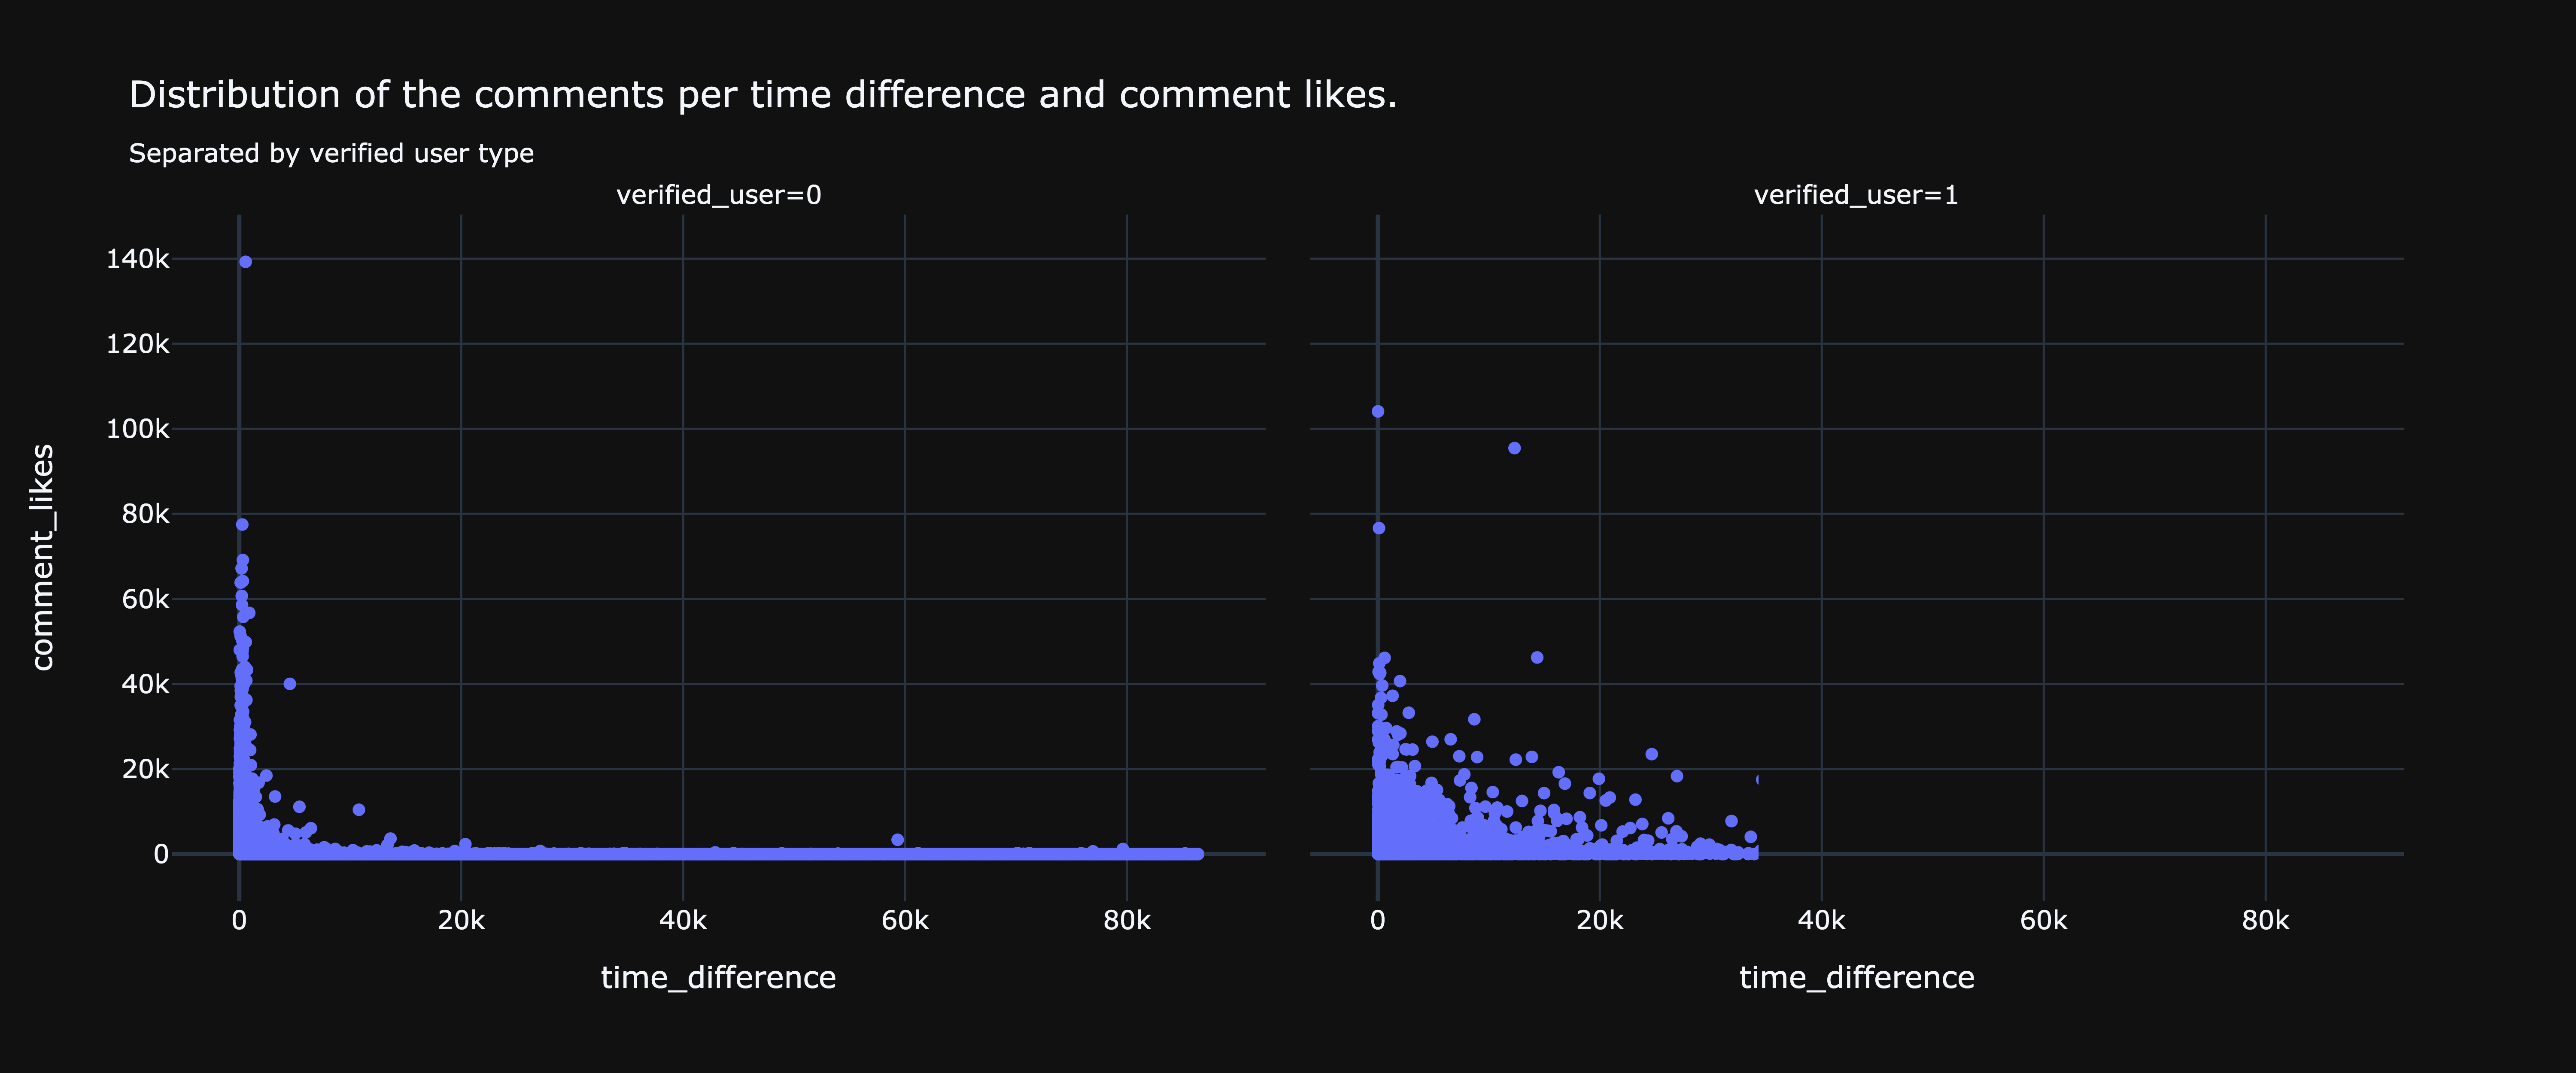

In [164]:
fig = px.scatter(df_comments, 
                 x='time_difference', 
                 y='comment_likes', 
                 facet_col='verified_user',
                 title = 'Distribution of the comments per time difference and comment likes.<br><sub>Separated by verified user type')


# Export
file_name = 'Time difference vs comment likes - Dual scatter verified users'
sv.save_plotly(fig, file_name, 'image')

There is a general trend, the more time after the post is posted you comment, the less likes you will have. This is because there are already a bunch of poeple that have seen the post before the late comment so less potential like count. Except in rare situations, this is always the case for non verified users, they always have low likes if they don't comment at the beginning. For verified users, it's not the same as they ahave their followers naturally liking their comment or the page owner commenting on its own post. It'll be interesting to see how the distribution changes for bots/legit users.

### 1.4 Comment content

* While scraping the comments, I also collect the button name right under and collected in some comments 'Hide replies' and 'Reply'.
* Emojis: 

In [165]:
df_comments.query('comment.str.contains("Hide replies|Reply") and username in @pages').head()

,username,comment,comment_likes,page,verified_user,time_difference
253,slam,📷: @atibaphotoReply,1,slam,1,293
12326,brgridiron,Enjoy watching him while we can. Watch his ent...,214,brgridiron,1,137
12916,slam,🎥: @nbaonespnReply,2,slam,1,25
14672,espnnfl,Man did a full plank 😮😂Reply,2176,ESPN,1,167
15413,br_hoops,Final Score: Sierra Canyon 8️⃣3️⃣ Venice 4️⃣9️...,2,br_hoops,1,78


In [166]:
# Removing hide replies and reply from the comment
df_comments["comment"] = df_comments["comment"].apply(lambda x: x[:-12] if x[-12:]=="Hide replies" else x)
df_comments["comment"] = df_comments["comment"].apply(lambda x: x[:-5] if x[-5:]=="Reply" else x)

In [167]:
df_comments.query('comment.str.contains("Hide replies|Reply")')

,username,comment,comment_likes,page,verified_user,time_difference


In [168]:
# Adding a column with emoji count of the comments
df_comments["emoji_dict"] = df_comments["comment"].progress_apply(lambda x: su.count_emoji(x))

# Adding the count of distinct emoji and the count of emojis in total
df_comments["emoji_count"] = df_comments["emoji_dict"].apply(lambda x: sum(x.values()))
df_comments["emoji_count_distinct"] = df_comments["emoji_dict"].apply(lambda x: len(x.keys()))

# Removing emoji from comments
df_comments["comment_woemoji"] = df_comments["comment"].progress_apply(lambda x: demoji.replace(x, "").strip())

# Adding a columns containing all emojis
df_comments["emoji"] = df_comments["emoji_dict"].apply(lambda x: list(x.keys()))

df_comments.head()

  0%|          | 0/134465 [00:00<?, ?it/s]

  0%|          | 0/134465 [00:00<?, ?it/s]

,username,comment,comment_likes,page,verified_user,time_difference,emoji_dict,emoji_count,emoji_count_distinct,comment_woemoji,emoji
0,takeajaytrip,BRUH THE BUCKS CANT MISS A SHOT,2234,bleacherreport,0,31,{},0,0,BRUH THE BUCKS CANT MISS A SHOT,[]
1,reymarkable_p,Bobby Portis shooting > Steph shooting,3011,bleacherreport,0,107,{},0,0,Bobby Portis shooting > Steph shooting,[]
2,jimmy_jaime94,Bucks finna have a repeat 🏆 👀,967,bleacherreport,0,95,"{'🏆': 1, '👀': 1}",2,2,Bucks finna have a repeat,"[🏆, 👀]"
3,4thgearcrew,CRAZY EYES GOT MOVES LOL 🤣🤣😭,1024,bleacherreport,0,250,"{'😭': 1, '🤣': 2}",3,2,CRAZY EYES GOT MOVES LOL,"[😭, 🤣]"
4,__.jayriggz,Can’t wait for flights reaction 😂😂,966,bleacherreport,0,265,{'😂': 2},2,1,Can’t wait for flights reaction,[😂]


In [196]:
# top 20 most used emojis
all_emojis = ''

for emoji_dict in df_comments['emoji_dict']:
    for key, value in emoji_dict.items():
        for _ in range(value):
            all_emojis += key


sorted_emojis = sorted({emoji: all_emojis.count(emoji) for emoji in set(all_emojis)}.items(), key=lambda x: x[1], reverse=True)
sorted_emojis

In [170]:
rows = 5
cols = 20

lst = [['' for _ in range(rows)] for _ in range(cols)]


for index1 in range(rows):
    for index2 in range(cols):
        ind = index1 * cols + index2 + 1
        emoji, count = sorted_emojis[ind - 1]
        lst[index2][index1] = f'{ind}: {emoji} - {count} \t'

print('Top 100 most used emojis\n')
print(''.join([''.join([''.join(ls)]) + '\n' for ls in lst]))

Top 100 most used emojis

1: 😂 - 24018 	21: 🙏 - 1192 	41: 😈 - 639 	61: ✨ - 321 	81: 🌸 - 221 	
2: 🔥 - 16873 	22: 💪 - 1181 	42: 👑 - 638 	62: 🇬 - 316 	82: 😔 - 220 	
3: ️ - 10025 	23: 🤦 - 1088 	43: 🤷 - 638 	63: 🔵 - 305 	83: 💫 - 215 	
4: ❤ - 6374 	24: 🇦 - 1067 	44: 💰 - 589 	64: 💚 - 304 	84: 🇲 - 215 	
5: 😭 - 4342 	25: 🇧 - 1063 	45: 😤 - 561 	65: ⚽ - 290 	85: 😐 - 212 	
6: 👏 - 4285 	26: 😮 - 1021 	46: 🥺 - 502 	66: 👊 - 278 	86: 😏 - 210 	
7: 😍 - 3960 	27: 🏻 - 929 	47: 👍 - 499 	67: 🌈 - 272 	87: 😒 - 203 	
8: 🤣 - 3122 	28: 👀 - 869 	48: 🏿 - 458 	68: 🅿 - 269 	88: 🏈 - 201 	
9: 💜 - 2825 	29: 🖤 - 867 	49: ✅ - 451 	69: 😎 - 269 	89: ❗ - 200 	
10: 🙌 - 2353 	30: 🇸 - 854 	50: 🤍 - 440 	70: 🇩 - 268 	90: 👌 - 199 	
11: ‍ - 2237 	31: 💋 - 819 	51: 🇹 - 425 	71: 🙄 - 268 	91: 🍇 - 197 	
12: 💀 - 2182 	32: 🇨 - 789 	52: ⚡ - 422 	72: ☠ - 260 	92: ⭐ - 197 	
13: 💙 - 2166 	33: 🤡 - 782 	53: 🤔 - 419 	73: 💸 - 251 	93: 🥱 - 194 	
14: 🏾 - 1942 	34: 🏼 - 758 	54: 😅 - 415 	74: 🤩 - 250 	94: 🇿 - 194 	
15: 🇷 - 1939 	35: 🇺 - 738 	55: 😩 - 4

In [171]:
# This is to try to plot likes and emoji like top 10 emoji by bracket of likes


lst = []

for row in range(len(df_comments)):
    comment_likes = df_comments.loc[row, 'comment_likes']
    emoji_dict = df_comments.loc[row, 'emoji_dict']

#     emoji_dict = {'😂': 4, '🤦🏾‍♂️': 3}
    if emoji_dict == {}:
        continue

    # print(emoji_dict)
#     emoji_dict = {key: [value] for key, value in emoji_dict.items()}


    for key, value in emoji_dict.items():
        for _ in range(value):
            lst.append([key, comment_likes])

#     df_emoji = pd.DataFrame(emoji_dict).T.reset_index()
#     df_emoji.columns = ['emoji', 'count']

#     for row in df_emoji.index: 
#         df.loc[len(df)] = [df_emoji.iloc[row, 0], comment_likes]



# df

# # df.append([df_emoji]*5,ignore_index=True)
df = pd.DataFrame(lst, columns=['emoji', 'likes'])
df

,emoji,likes
0,🏆,967
1,👀,967
2,😭,1024
3,🤣,1024
4,🤣,1024
...,...,...
127073,😂,218
127074,😂,218
127075,😂,218
127076,😂,218


In [172]:
df['bin'] = pd.cut(df['likes'], list(range(0, max(df['likes']), 100)))

In [173]:
df = df.groupby(['bin'], as_index=False).agg({'emoji': ''.join})
df['emoji_count'] = df['emoji'].apply(lambda x: sorted({emoji: x.count(emoji) for emoji in set(x)}.items(), key=lambda x: x[1], reverse=True))
df['emoji'] = df['emoji'].apply(lambda x: ''.join(set(x)))

df.head(20)

,bin,emoji,emoji_count
0,"(0, 100]",⚧👍👁🛸🐱🍠🥅🦷🐨🦵🎮💭🍟🥇💦❕🚀🐐👆🐺🎙〽🇨🕶🙁🦶Ⓜ🇧🧼🇻🐅♿🏿🦊😶🦄🙌💇🌏🐝🏔💢🐮🤚🎸🌮...,"[(😂, 11694), (🔥, 8547), (️, 4726), (❤, 2977), ..."
1,"(100, 200]",👍👁🛸🐱🐨🥅🦵🍟🥇💦❕🚀🐐👆🐺🎙〽🇨🙁🥓🇧🧼🇻🐅🏿🦊😶🦄🙌💢🐮🤚🔴😮🗿🤤🕊🎬🙂📍😀🥀🔒🤥🏡🐻...,"[(😂, 1890), (️, 1475), (🔥, 1144), (❤, 1124), (..."
2,"(200, 300]",👁👍🐱🥅🦷🥇💦🚀🐐🐺🎙〽🇨🙁🇧🐅🏿🦄🙌🐮🤚🔴😮🤤🕊🙂🦡🔒🍓🤘😛🔵🦖🌟😊💫🐍🅿😈😡🔮⚪🥒🍀⬆😍...,"[(😂, 1138), (🔥, 605), (️, 400), (❤, 247), (😭, ..."
3,"(300, 400]",😟🦾👄🏆🟡👁👍😂🐱😬🌶🤠🇳⚠🎯🦯😷🧑🃏🇵🥇🏳⭐🚀🐐🤴🗣❤🇨🤧🎉🐬☕🇧🤌🥺💉💓🐯💜🏿🤷😶🦄🙌🇫...,"[(😂, 856), (🔥, 385), (️, 255), (😭, 156), (❤, 1..."
4,"(400, 500]",🏆📊🧍👍😂🐱😬🇳🎯😷🔑🃏🥇🦌⭐😗🇵🚀🐐🤴🗣❤🇨Ⓜ📈🎉🍑🇧👵🤌🥺💉💜🏋🏿🤷🇫🦄🙌🦟😶🏃🧡👑🐝🇬...,"[(😂, 571), (🔥, 209), (️, 177), (😭, 111), (🤣, 1..."
5,"(500, 600]",😟🏆🟡👍👁😂🐱😬🌶🛸🦴🇳🎯4🎮🇵🥇🦌⭐👃😯🔙☀💦🐐🗣🐏❤🤧📠🎉🧏🍑🇧🥺💉🐯💜🏿🤷🇫🦄🙌👑🇸🇬...,"[(😂, 464), (️, 278), (🔥, 250), (🟣, 142), (♻, 1..."
6,"(600, 700]",🏆👍5😂🤠😬🦴🎄🇳🎯🔑🇵🇴🏳🚀🐐💡🎙〽🗣❤🇨🤧📈🇧🤌🥺💉💜🇻🏿🤷📝🇫🙌👑🇸🇬🍜🦹😳💯🍽🎸👊❌...,"[(😂, 343), (🔥, 172), (️, 100), (😭, 99), (👏, 58..."
7,"(700, 800]",🏆🧍👍😂🤕🇳🃏🇵🤑🚀🐐〽🗣❤🇨🤧🦶📈☕🥺🇽💜🐅🏿🤷🙌👑🎥😳💯👊🦅👌😞😮🗿🥷😌🅰🕊👀😢🧐🙂🤩👏...,"[(😂, 315), (🔥, 121), (😭, 114), (️, 88), (❤, 52..."
8,"(800, 900]",🏆👍😂😬🎯🔑🇵🥇🐐🧀🤴❤🤧📈🏒🇧😓🤌👖🥺🐯💜🏿🤷🙌👑🇸😳💯🦅🔴👌🇪😮🐃🏥🥷😪👀😢🧐🤩👏💚🌍🐻...,"[(😂, 271), (🔥, 112), (😭, 77), (️, 76), (❤, 45)..."
9,"(900, 1000]",🏆🧍👍🔜😂😬🎯🦯🇵😯🔙🚀🐐🗣❤🇨🤧☕🇧🥺🇽🦘💜🏿🤷🙌👑🇬😳💯👊🔴😁👌😞😮🥷🕊👀😨😢🤩👏👨💍🇭...,"[(😂, 259), (🔥, 95), (😭, 53), (️, 46), (💀, 34),..."


## 2. Last 12 posts

In [180]:
query = '''
select 
    * 
from last_12_posts
'''

df_12 = pd.read_sql_query(query, con)
df_12.query('username in @pages').head()

,username,video_views,display_url,thumbnail_src,accessibility_caption,is_video,likes,comments,timestamp
59449,pubity,285266.0,https://scontent-lga3-2.cdninstagram.com/v/t51...,https://scontent-lga3-2.cdninstagram.com/v/t51...,None,1,55245.0,283.0,1.642585e+09
59450,pubity,NaN,https://scontent-lga3-2.cdninstagram.com/v/t51...,https://scontent-lga3-2.cdninstagram.com/v/t51...,"Photo by Pubity on January 18, 2022. May be an...",0,120712.0,569.0,1.642577e+09
59451,pubity,NaN,https://scontent-lga3-2.cdninstagram.com/v/t51...,https://scontent-lga3-2.cdninstagram.com/v/t51...,"Photo by Pubity on January 18, 2022. May be an...",0,242937.0,734.0,1.642574e+09
59452,pubity,3127494.0,https://scontent-lga3-2.cdninstagram.com/v/t51...,https://scontent-lga3-2.cdninstagram.com/v/t51...,None,1,485572.0,2587.0,1.642553e+09
59453,pubity,5009973.0,https://scontent-lga3-2.cdninstagram.com/v/t51...,https://scontent-lga3-2.cdninstagram.com/v/t51...,None,1,456726.0,3602.0,1.642548e+09


In [181]:
df_12.describe(include='all').round()

,username,video_views,display_url,thumbnail_src,accessibility_caption,is_video,likes,comments,timestamp
count,363408,66420.0,363408,363408,288358,363408,363408.0,363408.0,3.634080e+05
unique,40638,NaN,363394,363392,275410,2,NaN,NaN,NaN
top,bertilenasso,NaN,https://scontent-lga3-1.cdninstagram.com/v/t51...,https://scontent-lga3-1.cdninstagram.com/v/t51...,"Photo by Anabelle on January 15, 2022. May be ...",0,NaN,NaN,NaN
freq,24,NaN,2,2,23,296988,NaN,NaN,NaN
mean,NaN,8438.0,NaN,NaN,NaN,NaN,419.0,17.0,1.621347e+09
std,NaN,197168.0,NaN,NaN,NaN,NaN,6501.0,76.0,3.182074e+07
min,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.334434e+09
25%,NaN,121.0,NaN,NaN,NaN,NaN,26.0,1.0,1.616687e+09
50%,NaN,381.0,NaN,NaN,NaN,NaN,74.0,4.0,1.634504e+09
75%,NaN,1471.0,NaN,NaN,NaN,NaN,189.0,14.0,1.640617e+09


In [184]:
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363408 entries, 0 to 363407
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   username               363408 non-null  object 
 1   video_views            66420 non-null   float64
 2   display_url            363408 non-null  object 
 3   thumbnail_src          363408 non-null  object 
 4   accessibility_caption  288358 non-null  object 
 5   is_video               363408 non-null  object 
 6   likes                  363408 non-null  float64
 7   comments               363408 non-null  float64
 8   timestamp              363408 non-null  float64
dtypes: float64(4), object(5)
memory usage: 25.0+ MB


Couple of insights from that: 
* Missing values in video views and in is_video but not the same number of missing values which is odd
* Most of the columns seem to have the right datatype. Only is_video is an object where it should be an integer. 


## Playground

In [183]:
os.system('say "done"')

0